In [1]:
import numpy as np
import sys
import drjit as dr 
import mitsuba as mi
mi.set_variant("cuda_ad_rgb")
sys.path.append("../../")
from PDE2D.utils.sketch import *
from PDE2D.BoundaryShape import *
import matplotlib.gridspec as gridspec
import matplotlib
from PDE2D import PATH
import os
from PDE2D.utils import *

In [2]:
linewidth = 1
colors = ["grey", "darkcyan", "darkturquoise", "paleturquoise"]
frame_color = "white"
e_size = 3
def disable_ticks(ax):
    """Disable ticks around plot (useful for displaying images)"""
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

def disable_ticks_y(ax):
    """Disable ticks around plot (useful for displaying images)"""
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticks([])

def disable_border(ax):
    """Disable border around plot"""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

In [3]:

col_width = COLUMN_WIDTH

matplotlib.rcParams.update(MPL_STYLE)

## SDF FD Test

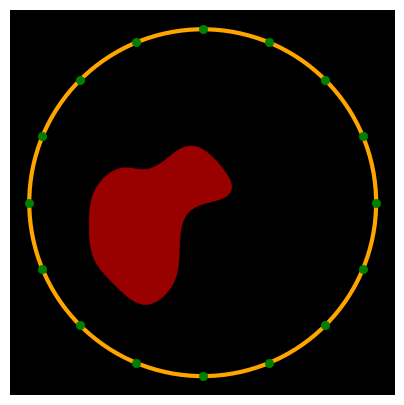

In [4]:
box_length = 2.1
box_center = [0,0]
sdf_res = 16
num_electrodes = 16
injections  = mi.Vector2f([0,10])
sdf_array   = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1,-1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1,-1, 1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1,-1,-1,-1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


in_shape = sdf1 = SDFGrid(tensor_np= sdf_array, box_length=box_length, box_center=box_center, epsilon = 1e-5, redistance = True, high_res=2048)
out_boundary = CircleWithElectrodes(radius = 1, injection_confs = [[0,10], [1,2]], is_delta = True)
shape = BoundaryWithDirichlets(out_boundary, [sdf1], dirichlet_values = [[0]])
data_holder = DataHolder(shape)
wos = WostConstant(input=data_holder)
bbox = [[-1.05,-1.05],[1.05,1.05]]
fig, ax = plt.subplots(1,1, figsize = (5,5))
shape.sketch_image(ax, bbox = [[-1.11,-1.11],[1.11,1.11]], resolution = [1024,1024]);


/home/ekrem/repos/MC-PDE3D/PDE2D/BoundaryShape/sdf_utils.py:298: UserWarning: The following kwargs were not used by contour: 'lw'
  ax1.contour(X, Y, d, colors = ["white"], lw = 5, levels = np.array([0]))
/home/ekrem/repos/MC-PDE3D/PDE2D/BoundaryShape/sdf_utils.py:299: UserWarning: The following kwargs were not used by contour: 'lw'
  ax2.contour(X, Y, d, colors = ["white"], lw = 5, levels = np.array([0]))
GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinLibertineT as it is too large, embedding a subset.


'/home/ekrem/repos/MC-PDE3D/figures/sdf-field/sdf-field.pdf'

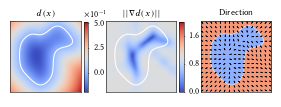

In [5]:
bpoints, _ = in_shape.create_boundary_points(distance = 0, res = 64, spp = 1, discrete_points = True)
bbox1 = [[-0.8, -0.7],[0.3,0.4]]
visualize_grad(in_shape, bbox1, resolution = [1024, 1024],  range = 1, res_angle = 16, norm = True, col_width_image=col_width)
#plt.savefig("sdf-field.pdf", bbox_inches='tight', pad_inches=0.04, dpi=300)
save_fig("sdf-field", os.path.join(PATH, "figures"))

/home/ekrem/repos/MC-PDE3D/PDE2D/BoundaryShape/sdf_utils.py:298: UserWarning: The following kwargs were not used by contour: 'lw'
  ax1.contour(X, Y, d, colors = ["white"], lw = 5, levels = np.array([0]))
/home/ekrem/repos/MC-PDE3D/PDE2D/BoundaryShape/sdf_utils.py:299: UserWarning: The following kwargs were not used by contour: 'lw'
  ax2.contour(X, Y, d, colors = ["white"], lw = 5, levels = np.array([0]))
GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinLibertineT as it is too large, embedding a subset.


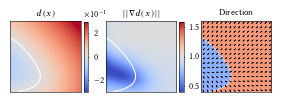

In [6]:

#bpoints, _, _ = in_shape.create_boundary_points(distance = 0, res = 64, spp = 1, discrete_points = True)
bbox2 = [[-0.0,-0.0],[0.4,0.4]]
visualize_grad(in_shape, bbox2, resolution = [1024, 1024], range = 0.6, res_angle = 16, range_d = 0.3, norm = True, cmap = "coolwarm", col_width_image=col_width)
#plt.tight_layout()
#plt.savefig("sdf-field-zoomed.pdf", bbox_inches='tight', pad_inches=0.005, dpi=300)
save_fig("sdf-field-zoomed", os.path.join(PATH, "figures"))
plt.savefig(os.path.join(PATH, "figures", "png", "sdf-field-zoomed.png"), bbox_inches='tight', pad_inches=0.04, dpi=1000)

distance = 0.01
distance = 0.1
distance = 0.2


GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinLibertineT as it is too large, embedding a subset.


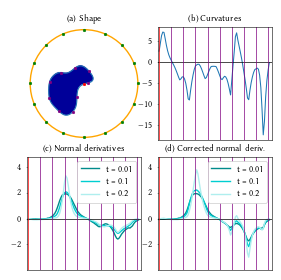

In [7]:
distances = [0.01, 0.1, 0.2]
#e_size = 5
visualize2(wos, bbox = bbox, spp = 20, distances = distances, color_points = "purple", 
           colors = colors[1:], lw = linewidth, e_size = e_size, image_width = col_width)
#plt.savefig("normal-der.pdf", bbox_inches='tight', pad_inches=0.005, dpi=300)
save_fig("normal-der", os.path.join(PATH, "figures"))
plt.savefig(os.path.join(PATH, "figures", "png", "normal-der.png"), bbox_inches='tight', pad_inches=0.04, dpi=1000)